In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\data\\heart_disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209C4C8EDC8>,
      dtype=object)

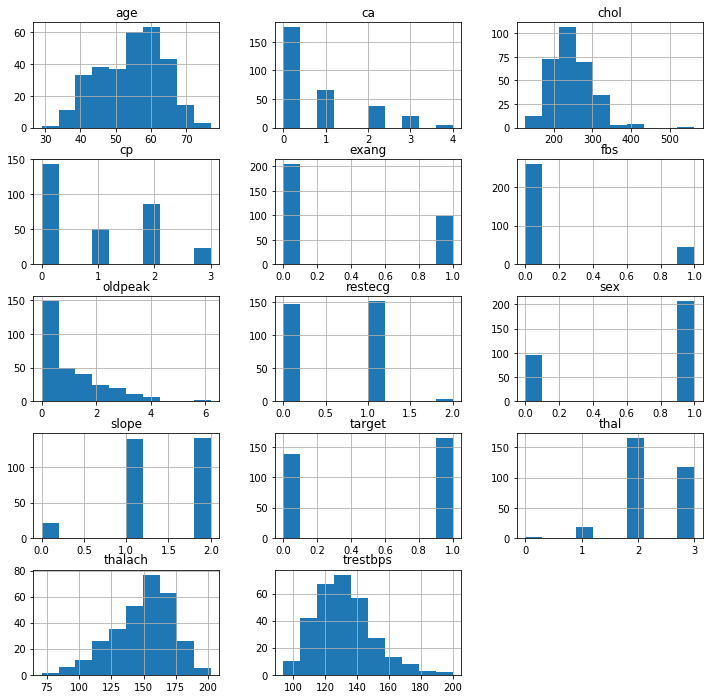

In [9]:
df.hist(figsize=(12,12), layout=(5,3))

# Age

In [10]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

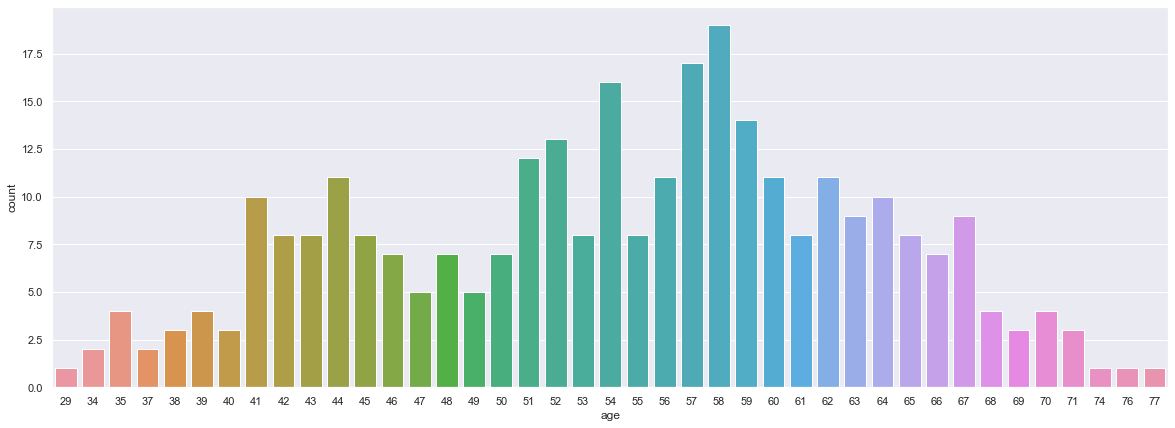

In [11]:
plt.figure(figsize=(20,7))
sns.set()
sns.countplot(df.age)

# Sex

In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

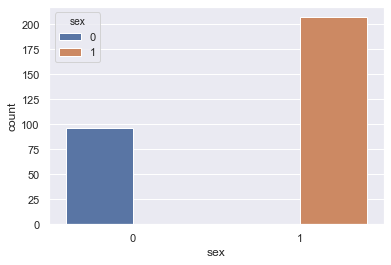

In [13]:
sns.countplot(x='sex',data=df, hue='sex')

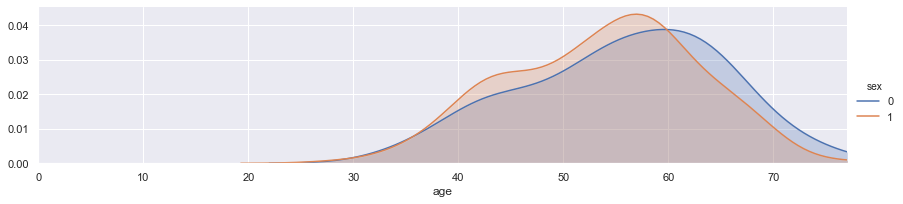

In [14]:
facet = sns.FacetGrid(df, hue="sex",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()
 
plt.show()

# Target

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

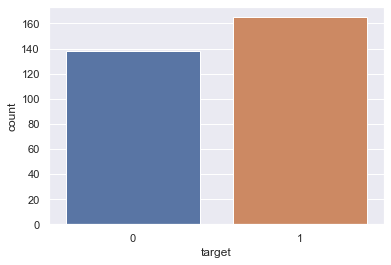

In [16]:
sns.countplot(x='target',data=df)

In [17]:
st=pd.crosstab(index=df['sex'],
            columns=[df['target']], 
            margins=True)
st

target,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


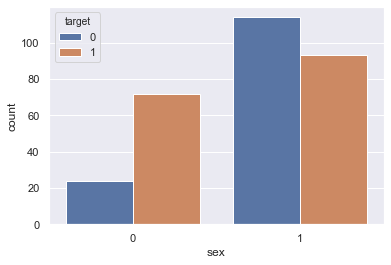

In [18]:

sns.countplot(x='sex', hue='target', data=df)

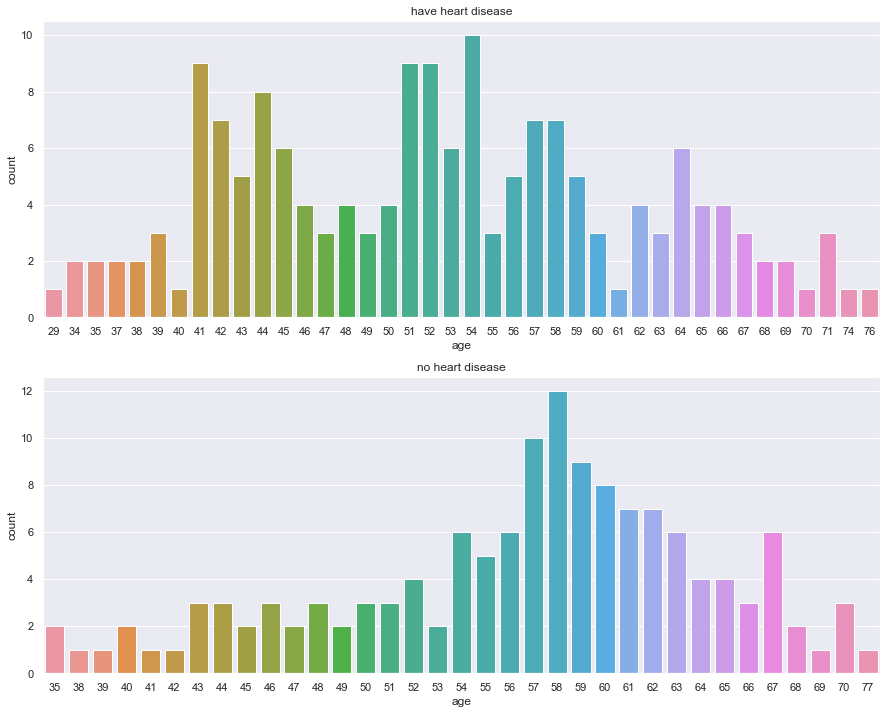

In [19]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('have heart disease')
ax1.tick_params(labelbottom='off',axis='x')
sns.countplot(df[df.target==1].age);
ax2 = fig.add_subplot(2,1,2)
ax2.set_title("no heart disease")
sns.countplot(df[df.target==0].age);

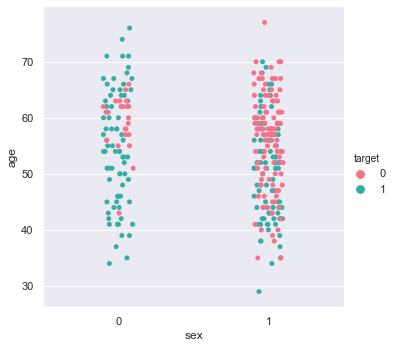

In [20]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

# Chest pain (cp)

In [21]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

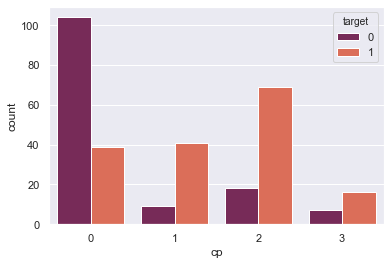

In [22]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

In [23]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


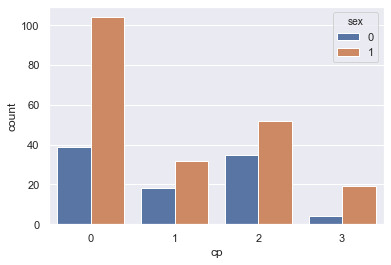

In [24]:
sns.countplot(x='cp', hue='sex',data=df)

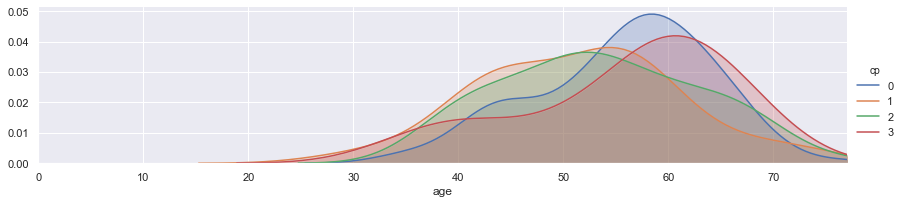

In [25]:
facet = sns.FacetGrid(df, hue="cp",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()
 
plt.show()

# Resting Blood Pressure (trestbps)

In [26]:
df['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

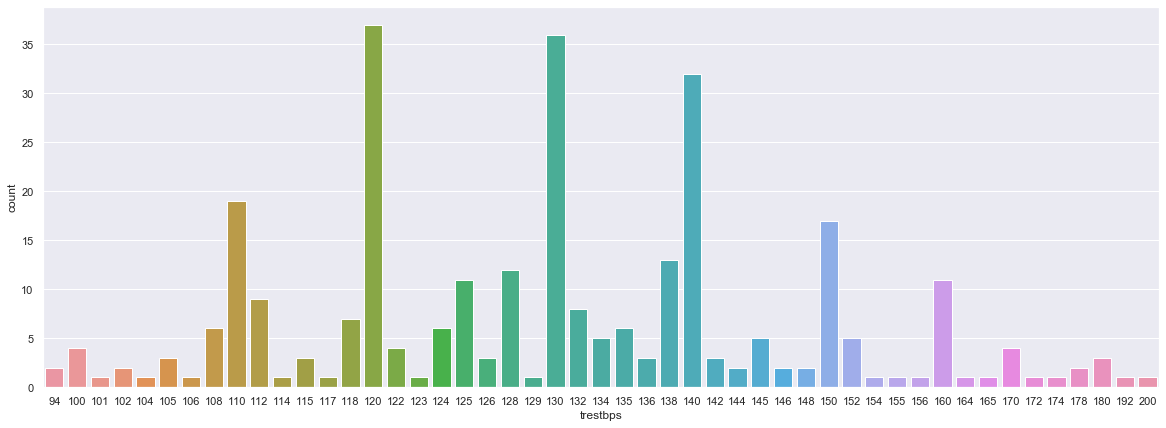

In [27]:
plt.figure(figsize=(20,7))
sns.set()
sns.countplot(df.trestbps)

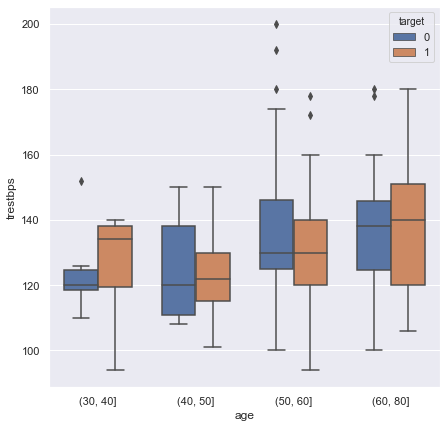

In [28]:
categ = pd.cut(df.age,[30,40,50,60,80])
dat_new = df[['target','trestbps']]
dat_new['age'] = categ
plt.figure(figsize=(7,7))
sns.boxplot(x='age',y='trestbps',hue='target',data=dat_new, width=0.7)

# Cholestrol (chol)

In [29]:
df['chol'].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

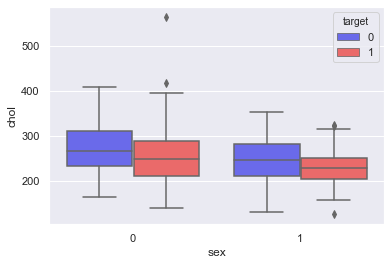

In [30]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

# Fasting Blood Sugar (fbs)

In [31]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

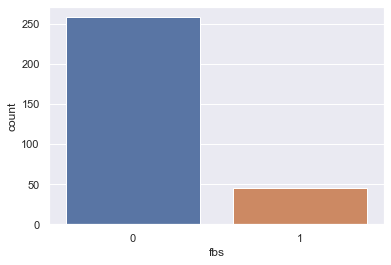

In [32]:
sns.countplot(x='fbs',data=df)

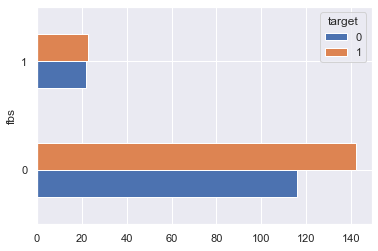

In [33]:
pd.crosstab(df.fbs,df.target).plot(kind='barh')

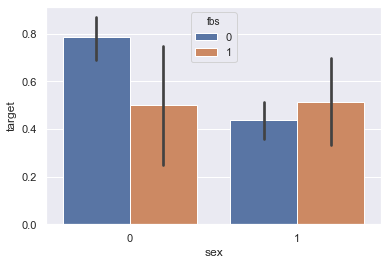

In [34]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

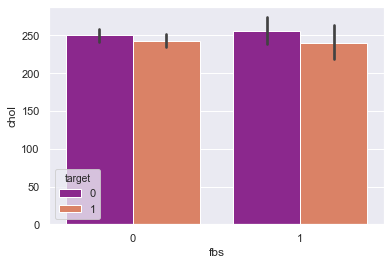

In [35]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

# Resting Electrocardiographic (restecg)

In [36]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

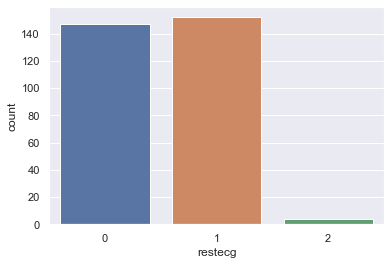

In [37]:
sns.countplot(x='restecg',data=df)

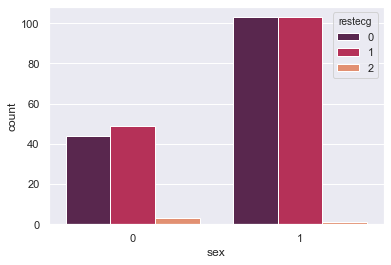

In [38]:
sns.countplot(x='sex' ,hue='restecg', data=df, palette='rocket')

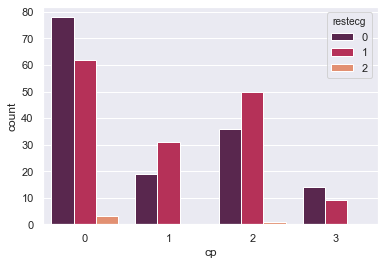

In [39]:
sns.countplot(x='cp' ,hue='restecg', data=df, palette='rocket')

# Maximum Heart Rate (thalach)

In [40]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

# Exercise induced Angina (exang)

In [41]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

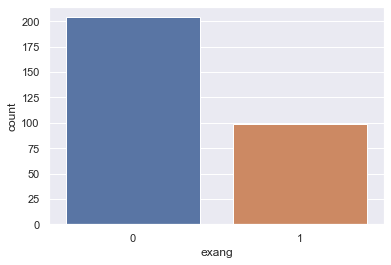

In [42]:
sns.countplot(x='exang',data=df)

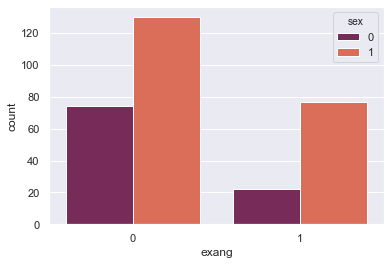

In [43]:
sns.countplot(x='exang' ,hue='sex', data=df, palette='rocket')

# oldpeak - ST depression induced by exercise relative to rest

In [44]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

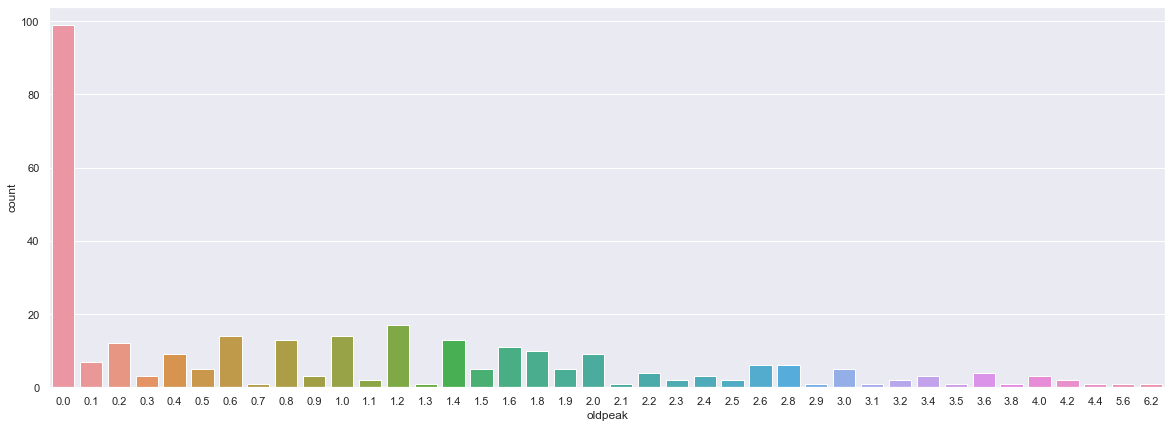

In [45]:
plt.figure(figsize=(20,7))
sns.set()
sns.countplot(df.oldpeak)

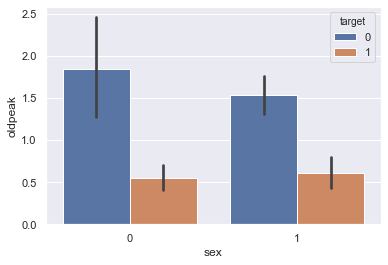

In [46]:
sns.barplot(x='sex', y='oldpeak', hue='target', data=df)

# slope - slope of the peak exercise ST segment

In [47]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

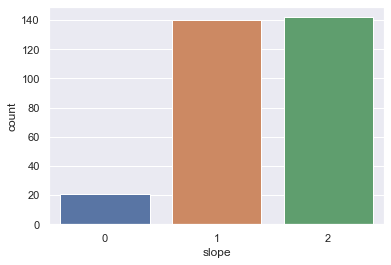

In [48]:
sns.countplot(x='slope',data=df)

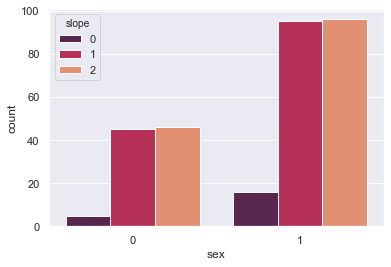

In [79]:
sns.countplot(x='sex' ,hue='slope', data=df, palette='rocket')

In [80]:
ss=pd.crosstab(index=df['sex'],
            columns=[df['slope']], 
            margins=True)
ss

slope,0,1,2,All
sex,,,,
0,5,45,46,96
1,16,95,96,207
All,21,140,142,303


# ca - number of major vessels

In [49]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

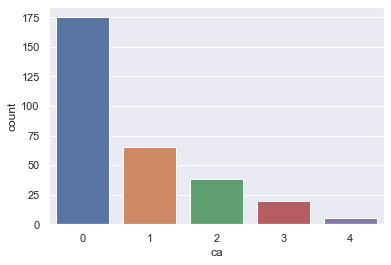

In [50]:
sns.countplot(x='ca',data=df)

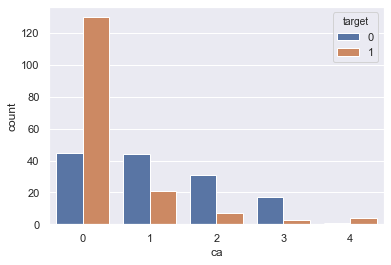

In [51]:
sns.countplot(x='ca',hue='target',data=df)

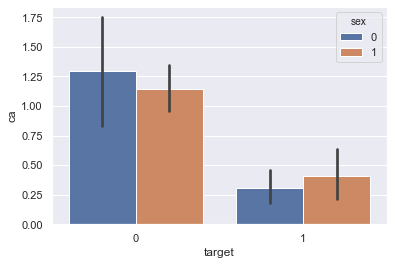

In [52]:
sns.barplot(x='target', y='ca', hue='sex', data=df)

# thal 

In [53]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

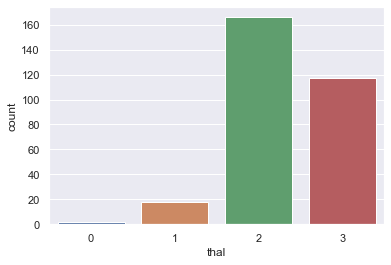

In [54]:
sns.countplot(x='thal',data=df)

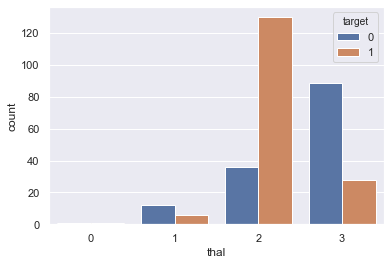

In [55]:
sns.countplot(x='thal',data=df, hue='target' )

In [56]:
sth=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
sth

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


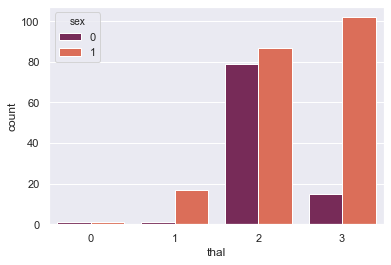

In [57]:
sns.countplot(x='thal', hue='sex',data=df, palette='rocket')

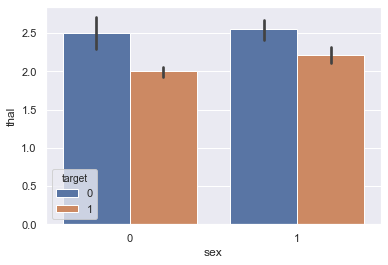

In [58]:
sns.barplot(x='sex', y='thal', data=df, hue='target')

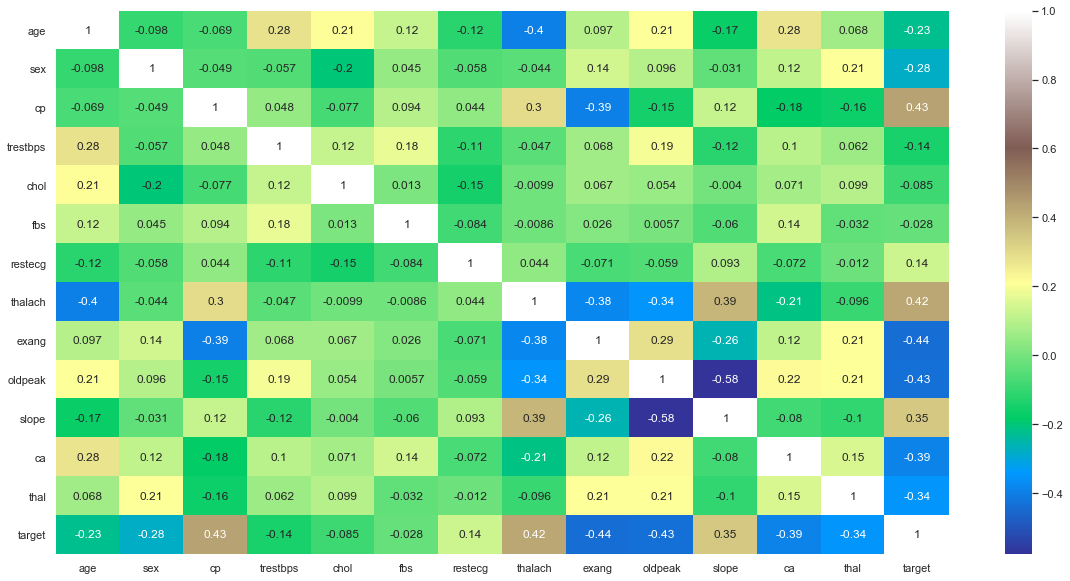

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [62]:
X= df.drop(['target'], axis=1)
y= df['target']

In [63]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



# Decision Tree

In [68]:

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [69]:
accuracy_score(y_test,prediction2)

0.7472527472527473

In [70]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        40
           1       0.79      0.75      0.77        51

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[34,  6],
       [ 5, 46]], dtype=int64)

In [73]:
accuracy_score(y_test, prediction3)

0.8791208791208791

In [74]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.88      0.90      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [75]:
from sklearn.svm import SVC

In [76]:
svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)

In [77]:
accuracy_score(y_test, prediction4)

0.9010989010989011

In [78]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('svm :', accuracy_score(y_test, prediction4))

lr : 0.9230769230769231
dtc : 0.7472527472527473
rfc : 0.8791208791208791
svm : 0.9010989010989011


# Best accuracy is given by Logistic Regression : 92